In [1]:
##pip install imodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data  = pd.read_csv("adult.csv",encoding='latin')

In [4]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [5]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(data,test_size=0.2,random_state=428)


In [6]:
Target=data.columns[-1]
Feature_names=np.array(data.columns)[:-1]
y = data[Target]
X = data.drop(axis=1,labels=Target,inplace=False)

In [7]:
X_train=train.drop(axis=1,labels=Target,inplace=False)
y_train=train[Target]

X_test=test.drop(axis=1,labels=Target,inplace=False)
y_test=test[Target]

In [138]:
import imodels
from imodels import OneRClassifier, BoostedRulesClassifier, FIGSClassifier, HSTreeClassifierCV



from imodels import RuleFitClassifier

## Rulefit rule set

In [27]:
rulefit = RuleFitClassifier(max_rules=10)


In [78]:
rulefit.fit(X_train, y_train, feature_names=Feature_names)


RuleFitClassifier(max_rules=10)

In [79]:

# get test performance
prediction = rulefit.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

print('##################')
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))



print("###################")
print("###################")

print(rulefit)

# inspect and print the rules

print("###################")
print("###################")
print('Rulefit has an alternative visualization:')


rules = rulefit._get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    # 'rule' is how the feature is constructed
    # 'coef' is its weight in the final linear model
    # 'support' is the fraction of points it applies to
rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      7442
           1       0.89      0.32      0.48      2327

    accuracy                           0.83      9769
   macro avg       0.86      0.66      0.69      9769
weighted avg       0.84      0.83      0.80      9769

##################
[[7349   93]
 [1572  755]]
Accuracy of the model on Testing Sample Data: 0.8
###################
###################
> ------------------------------
> RuleFit:
> 	Predictions are made by summing the coefficients of each rule
> ------------------------------
                                                                                             rule  coef
                                                                                  educational-num  0.04
                                                                                     capital-gain  0.00
                                               capital-gain <= 6509.5 and education

,rule,coef,support
4,educational-num,0.037019,1.000000
10,capital-gain,0.000058,1.000000
19,capital-gain <= 6509.5 and educational-num <= 12.5,-0.528469,0.735853
17,capital-gain <= 5095.5 and capital-loss <= 1794.5 and hours-per-week <= 40.5,-0.476757,0.666470
18,capital-gain <= 7073.5 and educational-num <= 10.5,-0.232992,0.664397
15,capital-gain <= 7073.5 and capital-loss <= 2218.0 and relationship <= 4.5 and relationship > 0.5,-1.397422,0.534359
14,capital-gain <= 7731.5 and educational-num <= 13.5 and relationship <= 4.5 and relationship > 0.5,-0.385911,0.510071
16,age <= 36.5 and capital-gain <= 5119.0 and capital-loss <= 1794.5,-0.354646,0.465155
21,educational-num > 9.5 and relationship <= 0.5,0.020164,0.225885
20,age > 33.5 and hours-per-week > 39.0 and educational-num > 9.5 and relationship <= 0.5,0.166375,0.160853


## 2. boosted rule set

In [31]:
brc = BoostedRulesClassifier(n_estimators=10)

In [32]:
brc.fit(X_train, y_train, feature_names=Feature_names)

BoostedRulesClassifier()

In [34]:

# get test performance
prediction = brc.predict(X_test)

print(metrics.classification_report(y_test, prediction))

print('##################')
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


              precision    recall  f1-score   support

           0       0.91      0.74      0.81      7442
           1       0.48      0.77      0.59      2327

    accuracy                           0.75      9769
   macro avg       0.70      0.76      0.70      9769
weighted avg       0.81      0.75      0.76      9769

##################
[[5479 1963]
 [ 525 1802]]
Accuracy of the model on Testing Sample Data: 0.76


In [35]:
print(brc)

> ------------------------------
> BoostedRules:
> 	Rule → predicted probability (final prediction is weighted sum of all predictions)
> ------------------------------
  If relationship <= 0.5 → 0.00 (weight: 0.58)
  If relationship > 0.5 → 0.40 (weight: 0.50)
  If relationship <= 0.5 → 0.25 (weight: 0.37)
  If relationship > 0.5 → 0.05 (weight: 0.11)
  If educational-num <= 12.5 → 0.75 (weight: 0.34)
  If educational-num > 12.5 → 0.05 (weight: 0.22)
  If capital-gain <= 5119.0 → 1.00 (weight: 0.12)
  If capital-gain > 5119.0 → 0.05 (weight: 0.18)
  If age <= 27.5 → 1.00 (weight: 0.14)
  If age > 27.5 → 0.04 (weight: 0.10)



In [ ]:
##############################################

## Hierarchical shrinkage wrapper

In [128]:
from sklearn.tree import plot_tree, DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7442
           1       0.77      0.48      0.59      2327

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

##################
[[7111  331]
 [1206 1121]]
##################
Accuracy of the model on Testing Sample Data: 0.83
##################
Alternative visualization:


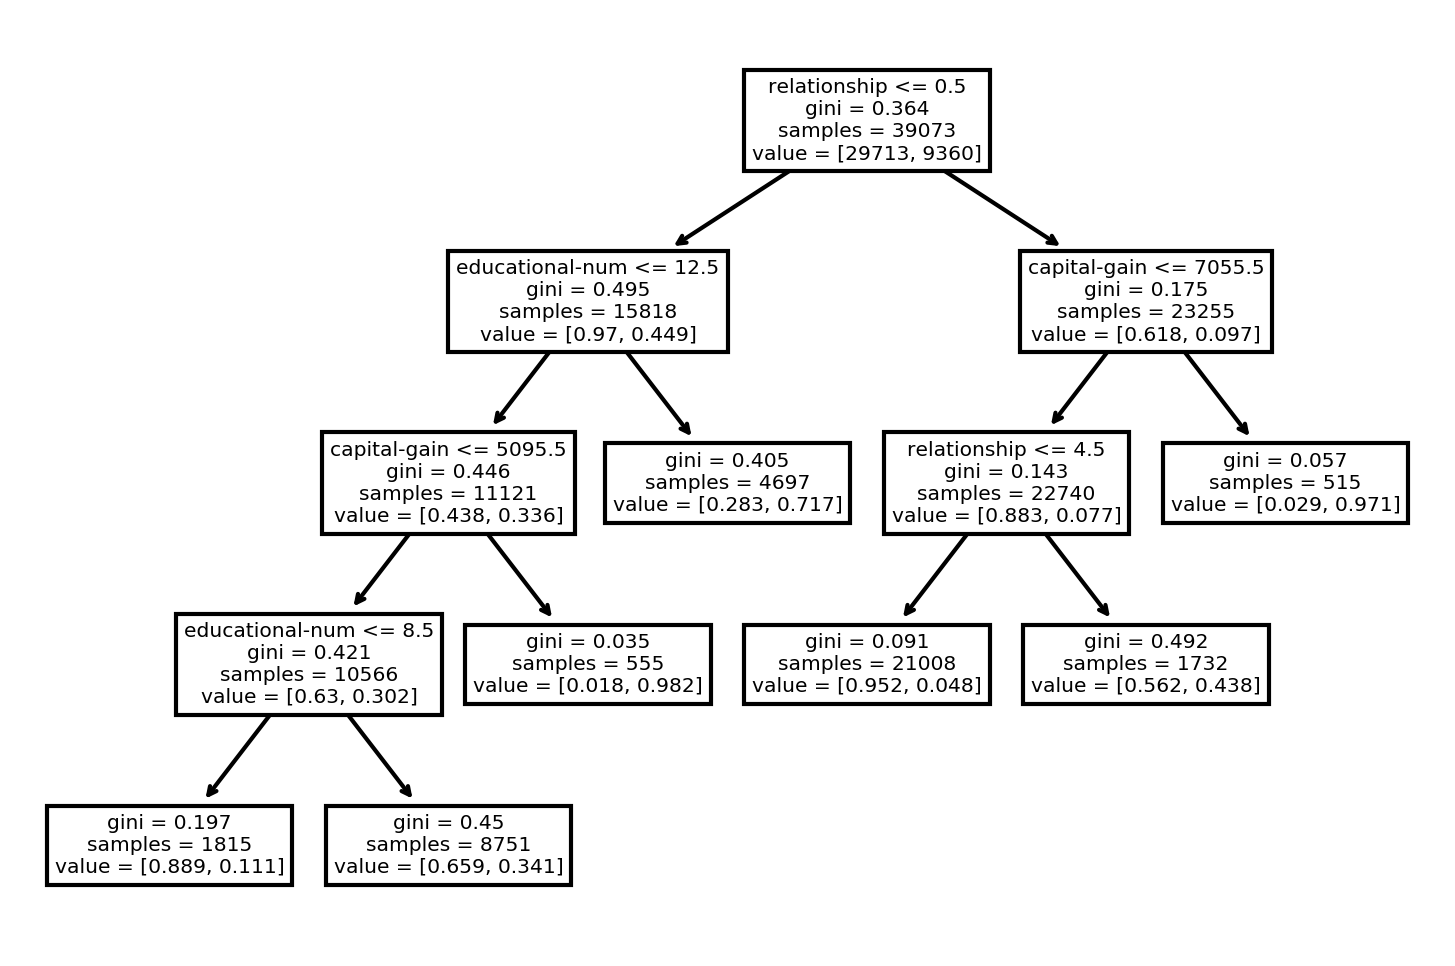

In [133]:
dt = HSTreeClassifierCV(max_leaf_nodes=7)
dt.fit(X_train, y_train, feature_names=Feature_names)

# calculate mse on the training data


# get test performance
prediction = dt.predict(X_test)

print(metrics.classification_report(y_test, prediction))

print('##################')
print(metrics.confusion_matrix(y_test, prediction))
print('##################')
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
print('##################')



print('Alternative visualization:')
plot_tree(dt.estimator_, feature_names=Feature_names)
# plt.savefig('tree.pdf')
plt.show()



## decision tree

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7442
           1       0.77      0.48      0.59      2327

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

##################
[[7111  331]
 [1206 1121]]
##################
Accuracy of the model on Testing Sample Data: 0.83
##################


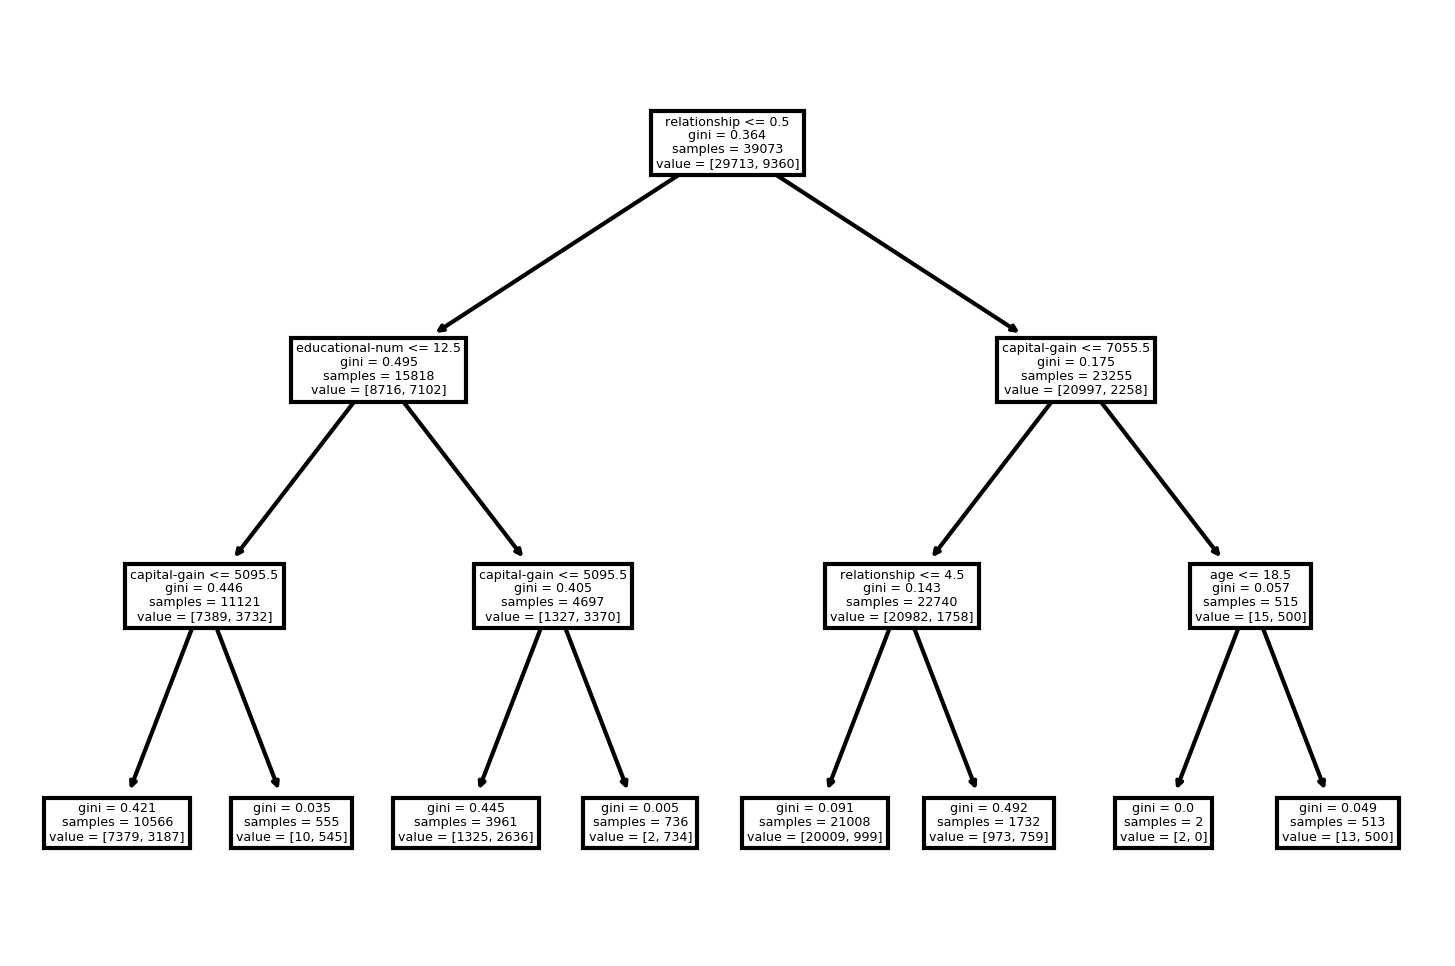

In [92]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# calculate mse on the training data

prediction = dt.predict(X_test)

print(metrics.classification_report(y_test, prediction))

print('##################')
print(metrics.confusion_matrix(y_test, prediction))
print('##################')
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
print('##################')




plot_tree(dt, feature_names=Feature_names)
# plt.savefig('tree.pdf')
plt.show()


In [93]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)


|--- feature_7 <= 0.50
|   |--- feature_4 <= 12.50
|   |   |--- feature_10 <= 5095.50
|   |   |   |--- class: 0
|   |   |--- feature_10 >  5095.50
|   |   |   |--- class: 1
|   |--- feature_4 >  12.50
|   |   |--- feature_10 <= 5095.50
|   |   |   |--- class: 1
|   |   |--- feature_10 >  5095.50
|   |   |   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_10 <= 7055.50
|   |   |--- feature_7 <= 4.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  4.50
|   |   |   |--- class: 0
|   |--- feature_10 >  7055.50
|   |   |--- feature_0 <= 18.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  18.50
|   |   |   |--- class: 1



## Greedy rule list

In [64]:
# fit a greedy rule list
#m = GreedyRuleListClassifier()
#m.fit(X_train, y_train, feature_names=Feature_names)  # stores into m.rules_





## OneR rule list

In [47]:
# fit a oneR model
m = OneRClassifier()
m.fit(X_train, y=y_train, feature_names=Feature_names)  # stores into m.rules_
probs = m.predict_proba(X_test)

# print the rule list
print(m)



mean 0.24 (39073 pts)
if capital-gain >= 5178 then 0.949 (1898 pts)
mean 0.203 (37175 pts)
if capital-gain >= 4386 then 0.32 (331 pts)
mean 0.202 (36844 pts)
if capital-gain >= 3137 then 0.204 (36488 pts)
mean 0 (356 pts)



In [48]:

prediction = m.predict(X_test)

print(metrics.classification_report(y_test, prediction))

print('##################')
print(metrics.confusion_matrix(y_test, prediction))
print('##################')
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
print('##################')


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7442
           1       0.94      0.17      0.29      2327

    accuracy                           0.80      9769
   macro avg       0.87      0.59      0.59      9769
weighted avg       0.83      0.80      0.74      9769

##################
[[7415   27]
 [1920  407]]
##################
Accuracy of the model on Testing Sample Data: 0.74
##################


## Skope rule set

In [52]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules

skp = SkopeRules(
                 max_depth=4,
                 max_depth_duplication=2,
                 n_estimators=50,
                 precision_min=0.5,
                 recall_min=0.05,
                 feature_names=Feature_names
                 )
 
skp.fit(X_train, y_train)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: capital-gain <= 5095.5 and hours-per-week > 31.0 and educational-num > 11.5 and relationship <= 0.5
precision: 0.6709996904982978
recall: 0.2905387295631198

rule: capital-gain > 5095.5 and educational-num > 11.5 and relationship <= 0.5
precision: 0.9967684424571323
recall: 0.08250398610142118

rule: age > 21.0 and capital-gain > 7073.5 and educational-num > 3.0 and relationship > 0.5
precision: 0.9857142857142858
recall: 0.055009301089556206




In [53]:
prediction = skp.predict(X_test)

print(metrics.classification_report(y_test, prediction))

print('##################')
print(metrics.confusion_matrix(y_test, prediction))
print('##################')
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
print('##################')


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7442
           1       0.76      0.45      0.56      2327

    accuracy                           0.83      9769
   macro avg       0.80      0.70      0.73      9769
weighted avg       0.83      0.83      0.82      9769

##################
[[7107  335]
 [1287 1040]]
##################
Accuracy of the model on Testing Sample Data: 0.82
##################


In [51]:

## confusion matrix

## [TP FP]
## [FN TN]




## Greedy tree sums (FIGS)

In [95]:
from imodels import FIGSClassifier

In [124]:
clf = FIGSClassifier()

In [125]:
clf.fit(X_train, y_train,feature_names= Feature_names)

FIGSClassifier()

In [126]:
print(clf)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree
> ------------------------------
relationship <= 0.500 (Tree #0 root)
	educational-num <= 8.500 (split)
		Val: 0.222 (leaf)
		hours-per-week <= 34.500 (split)
			Val: 0.214 (leaf)
			age <= 35.500 (split)
				Val: 0.374 (leaf)
				capital-gain <= 3120.000 (split)
					Val: 0.506 (leaf)
					Val: 0.352 (leaf)
	Val: 0.097 (leaf)

	+
capital-gain <= 5119.000 (Tree #1 root)
	educational-num <= 12.500 (split)
		capital-loss <= 1978.500 (split)
			Val: -0.074 (leaf)
			Val: -0.368 (leaf)
		age <= 30.500 (split)
			Val: -0.017 (leaf)
			Val: 0.189 (leaf)
	Val: 0.612 (leaf)

	+
relationship <= 4.500 (Tree #2 root)
	Val: -0.017 (leaf)
	Val: 0.347 (leaf)

	+
capital-loss <= 1820.500 (Tree #3 root)
	Val: -0.011 (leaf)
	Val: 0.334 (leaf)

	+
hours-per-week <= 40.500 (Tree #4 root)
	Val: -0.003 (leaf)
	Val: 0.054 (leaf)



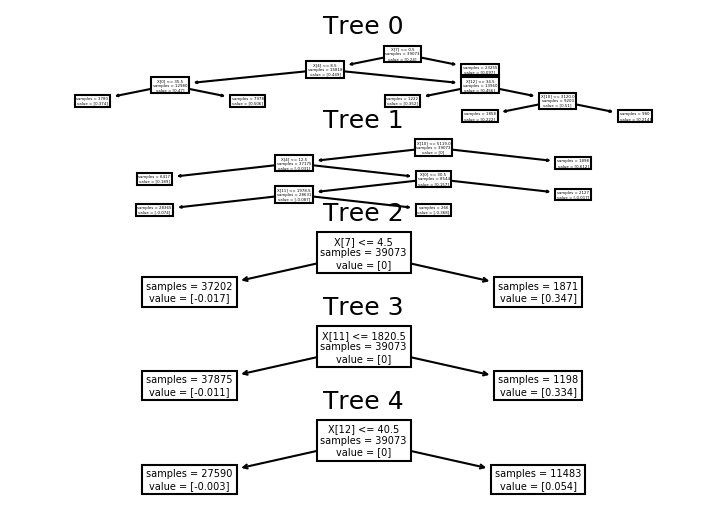

In [134]:
clf.plot()

In [127]:
prediction = clf.predict(X_test)

print(metrics.classification_report(y_test, prediction))

print('##################')
print(metrics.confusion_matrix(y_test, prediction))
print('##################')
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
print('##################')


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7442
           1       0.79      0.51      0.62      2327

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769

##################
[[7133  309]
 [1133 1194]]
##################
Accuracy of the model on Testing Sample Data: 0.84
##################
